In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# x'' + w_0**2 * x = 0 
# x'' = d**2 x / d**2 y

# dV / dt + w_0**2 * x = 0
# dx / dt = V

In [ ]:
w = 5
t0 = 0
tmax = 10
dt = 0.1
N = int(tmax / dt)
t = np.arange(t0, tmax, dt)
A = 1
cofe = np.exp(-t / 2)


In [ ]:
# Идеал
x_a = A * np.exp(-t / 2) * np.cos(w * t)


In [ ]:
# Эйлер

x_e = np.zeros(N)
v = np.zeros(N)

x_e[0] = A
v[0] = 0
t_i = 0

for i in range(N - 1):
    t_i += dt
    v[i + 1] = v[i] - v[i] * dt - (w**2) * x_e[i] * dt
    x_e[i + 1] = x_e[i] + v[i + 1] * dt

In [ ]:
# Рунге-Кутт

x_r = np.zeros(N)
v_r = np.zeros(N)

x_r[0] = A
v_r[0] = 0

for i in range(N - 1):
    kv1 = - v_r[i] * dt -(w**2) * x_r[i] * dt
    kx1 = v_r[i] * dt

    kv2 = - v_r[i] * dt -(w**2) * (x_r[i] + kx1 / 2) * dt
    kx2 = (v_r[i] + kv1 / 2) * dt

    kv3 = - v_r[i] * dt -(w**2) * (x_r[i] + kx2 / 2) * dt
    kx3 = (v_r[i] + kv2 / 2) * dt

    kv4 = - v_r[i] * dt -(w**2) * (x_r[i] + kx3) * dt
    kx4 = (v_r[i] + kv3) * dt

    v_r[i + 1] = v_r[i] + (kv1 + 2 * kv2 + 2 * kv3 + kv4) / 6
    x_r[i + 1] = x_r[i] + (kx1 + 2 * kx2 + 2 * kx3 + kx4) / 6

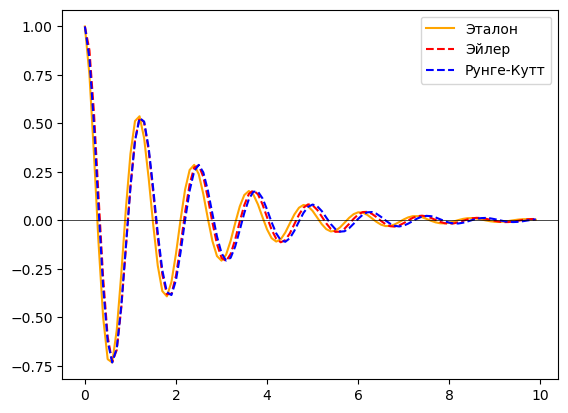

In [116]:
plt.plot(t, x_e, 'orange')

plt.plot(t, x_r, 'r--')

plt.plot(t, x_a, 'b--')
plt.legend(['Эталон', 'Эйлер', 'Рунге-Кутт'])
plt.axhline(y = 0, color='black', linewidth=0.5)


In [137]:
# Погрешности
m_dt = np.arange(0.01, 0.3, 0.01)
Aver_err_euler = []
Aver_err_rangi = []
it = 0
for dt in m_dt:
    N = int(tmax / dt)
    t = np.arange(t0, tmax, dt)

    # Идеал
    x_a = A * np.exp(-t / 2) * np.cos(w * t)

    # Эйлер
    x_e = np.zeros(N)
    v = np.zeros(N)
    
    x_e[0] = A
    v[0] = 0
    t_i = 0
    
    for i in range(N - 1):
        t_i += dt
        v[i + 1] = v[i] - v[i] * dt - (w**2) * x_e[i] * dt
        x_e[i + 1] = x_e[i] + v[i + 1] * dt

    # Рунге-Кутт
    x_r = np.zeros(N)
    v_r = np.zeros(N)
    
    x_r[0] = A
    v_r[0] = 0
    
    for i in range(N - 1):
        kv1 = - v_r[i] * dt -(w**2) * x_r[i] * dt
        kx1 = v_r[i] * dt
    
        kv2 = - v_r[i] * dt -(w**2) * (x_r[i] + kx1 / 2) * dt
        kx2 = (v_r[i] + kv1 / 2) * dt
    
        kv3 = - v_r[i] * dt -(w**2) * (x_r[i] + kx2 / 2) * dt
        kx3 = (v_r[i] + kv2 / 2) * dt
    
        kv4 = - v_r[i] * dt -(w**2) * (x_r[i] + kx3) * dt
        kx4 = (v_r[i] + kv3) * dt
    
        v_r[i + 1] = v_r[i] + (kv1 + 2 * kv2 + 2 * kv3 + kv4) / 6
        x_r[i + 1] = x_r[i] + (kx1 + 2 * kx2 + 2 * kx3 + kx4) / 6

    
    # сред погрешность
    err_euler = np.abs(x_a - x_e) / N
    err_rang = np.abs(x_a - x_r) / N

    Aver_err_euler.append(err_euler)
    Aver_err_rangi.append(err_rang)
    it+=1

plt.plot(Aver_err_euler, dt)






ValueError: operands could not be broadcast together with shapes (334,) (333,) 